Nama Kelompok :

NPM : 200411100171 (Ketua)
Ahmad Farisul Haq

NPM : 200411100201 (Anggota)
Arifatul Maghfiroh

# Timeseries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [75]:
def df_to_X_y(df, window_size=2):
  X, y = [], []
  # df = df.to_numpy()
  for i in range(len(df) - window_size):
    seq_x, seq_y = df[i:i+window_size], df[i+window_size]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

## Read Data

In [76]:
data = pd.read_csv('airline-passengers.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


## Jumlah Data

In [77]:
data.count()

Month         144
Passengers    144
dtype: int64

## Set index dates to data

In [78]:
data["Month"] = pd.to_datetime(data.Month, dayfirst=True)
data.set_index("Month", inplace=True)

In [79]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## plot data

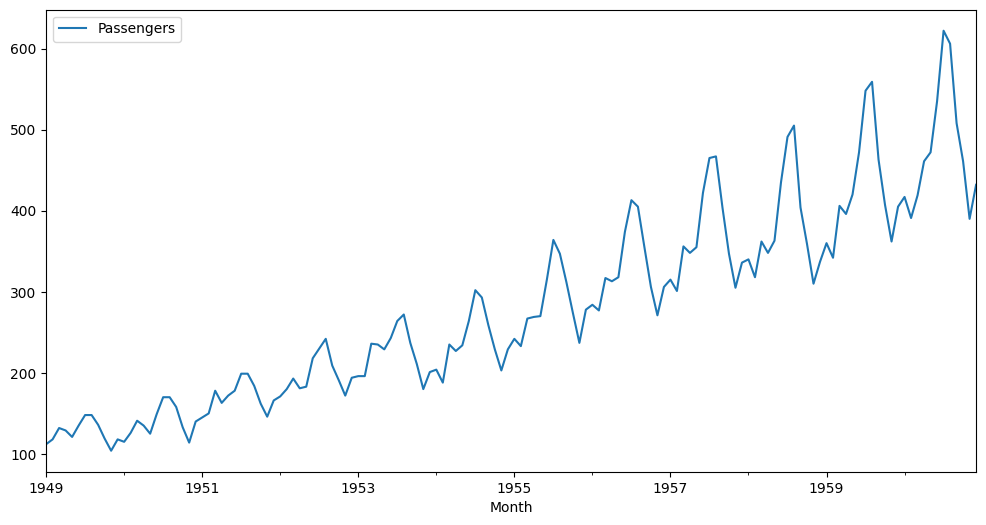

In [80]:
data.plot(figsize=(12,6)).autoscale(axis='x',tight=True)

# Prepocessing

## Timestamp

In [81]:
data['Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [82]:
window_size = 14
X, y = df_to_X_y(data['Passengers'], window_size)

## Chek ukuran data

In [83]:
X.shape, y.shape

((130, 14), (130,))

## Normalisasi

In [84]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(X)
scaled

array([[0.01758242, 0.03076923, 0.06153846, ..., 0.00787402, 0.0019685 ,
        0.02362205],
       [0.03076923, 0.06153846, 0.05494505, ..., 0.0019685 , 0.02362205,
        0.05314961],
       [0.06153846, 0.05494505, 0.03736264, ..., 0.02362205, 0.05314961,
        0.04133858],
       ...,
       [1.        , 0.78901099, 0.66593407, ..., 1.        , 0.96850394,
        0.77559055],
       [0.78901099, 0.66593407, 0.56703297, ..., 0.96850394, 0.77559055,
        0.68307087],
       [0.66593407, 0.56703297, 0.66153846, ..., 0.77559055, 0.68307087,
        0.54330709]])

## Split data

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.2, random_state=0, shuffle=False)

# Modelling

## Training

In [86]:
gNB = GaussianNB()

# Train the classifier
gNB.fit(X_train, y_train)

GaussianNB()

## Test

In [87]:
y_pred=gNB.predict(X_train)

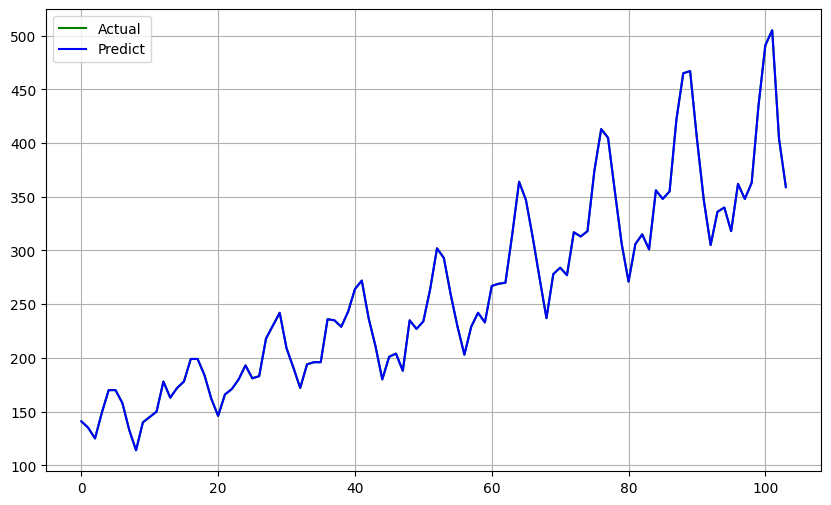

In [88]:
plt.figure(figsize=(10,6))
plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Closing Prices')
plt.plot(y_train, 'green', label='Actual')
plt.plot(y_pred, 'blue', label='Predict')
plt.legend()


# Evaluasi

## MAPE

In [89]:
print(f'mape = {mean_absolute_percentage_error(y_train, y_pred)}')

mape = 0.0
